# 1. Install Dependencies and Setup

In [2]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.18.0-cp311-cp311-win_amd64.whl (7.5 kB)
  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached matplotlib-3.9.2-cp311-cp311-win_amd64.whl (7.8 MB)
  Using cached tensorflow_intel-2.18.0-cp311-cp311-win_amd64.whl (390.2 MB)
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.6.0-py3-none-any.whl (21 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl (71 kB)
  Using cached protobuf-5.28.3-cp310-abi3-win_amd64.whl (431 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached grpcio-1.68.0-cp311-cp311-win_amd64.whl (4.4 MB)
  Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
  Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl (15.9 MB)
  Using cached h5py-3.12.1-cp311-cp311-win_amd64.whl (3.0 MB)
  Using ca


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
anyio                        4.6.2.post1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
babel                        2.16.0
beautifulsoup4               4.12.3
bleach                       6.2.0
certifi                      2024.8.30
cffi                         1.17.1
charset-normalizer           3.4.0
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.8
decorator                    5.1.1
defusedxml                   0.7.1
executing                    2.1.0
fastjsonschema               2.20.0
flatbuffers                  24.3.25
fonttools               

In [2]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [12]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\sad\aaxh2l5ni.webp
Image not in ext list data\sad\YZc3LzlASxePQJ_H-iexKQ.webp


# 3. Load Data

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [93]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 269 files belonging to 2 classes.


In [44]:
data_iterator = data.as_numpy_iterator()

In [45]:
batch = data_iterator.next()

In [20]:
batch

(array([[[[ 64.484375 ,  84.484375 ,  57.484375 ],
          [ 57.453125 ,  77.453125 ,  50.195312 ],
          [ 52.570312 ,  73.       ,  43.710938 ],
          ...,
          [  0.       ,  18.570312 ,  18.       ],
          [  0.       ,  19.       ,  19.484375 ],
          [  0.       ,  19.914062 ,  20.914062 ]],
 
         [[ 64.484375 ,  84.484375 ,  57.484375 ],
          [ 57.578003 ,  77.578    ,  50.44507  ],
          [ 53.262817 ,  73.484375 ,  45.095947 ],
          ...,
          [  0.       ,  16.148438 ,  15.578125 ],
          [  0.       ,  16.578125 ,  17.0625   ],
          [  0.       ,  17.492188 ,  18.492188 ]],
 
         [[ 63.664795 ,  83.383545 ,  56.78125  ],
          [ 57.184692 ,  76.90344  ,  50.044067 ],
          [ 53.63855  ,  73.417725 ,  46.068237 ],
          ...,
          [  0.       ,  13.349487 ,  12.859375 ],
          [  0.       ,  13.71875  ,  14.13501  ],
          [  0.       ,  14.6328125,  15.4921875]],
 
         ...,
 
         [[ 

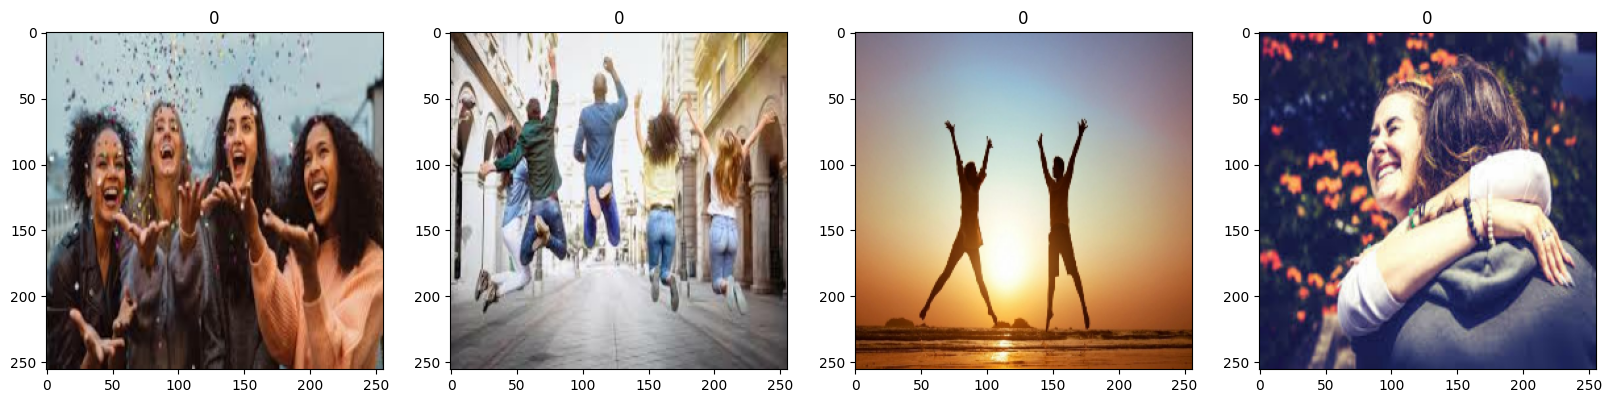

In [46]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [47]:
data = data.map(lambda x,y: (x/255, y))

In [48]:
data.as_numpy_iterator().next()

(array([[[[3.44270825e-01, 4.65839475e-01, 2.35294119e-01],
          [3.34773272e-01, 4.51378673e-01, 2.32812494e-01],
          [3.21139693e-01, 4.24954057e-01, 2.27450982e-01],
          ...,
          [2.66390920e-01, 3.57797176e-01, 1.61933213e-01],
          [2.38970593e-01, 3.60937506e-01, 1.55575976e-01],
          [2.48299628e-01, 3.91743273e-01, 1.80392161e-01]],
 
         [[3.44270825e-01, 4.65839475e-01, 2.35294119e-01],
          [3.34773272e-01, 4.51378673e-01, 2.32812494e-01],
          [3.21139693e-01, 4.24954057e-01, 2.27450982e-01],
          ...,
          [2.65610158e-01, 3.57016414e-01, 1.61152437e-01],
          [2.60567278e-01, 3.84974092e-01, 1.78392634e-01],
          [2.84459114e-01, 4.28279161e-01, 2.16739848e-01]],
 
         [[3.43910843e-01, 4.65479463e-01, 2.35578164e-01],
          [3.34527194e-01, 4.51132596e-01, 2.32566416e-01],
          [3.20949882e-01, 4.24764216e-01, 2.27261141e-01],
          ...,
          [2.62279063e-01, 3.54235142e-01, 1.5837

# 5. Split Data

In [49]:
len(data)

9

In [50]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [51]:
test_size+train_size+val_size

9

In [52]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [53]:
len(val)

2

# 6. Build Deep Learning Model

In [18]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [55]:
model = Sequential()

In [56]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Victor\ImageClassification\imageClassification\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [59]:
logdir='logs'

In [60]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [61]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - accuracy: 0.5080 - loss: 0.8686 - val_accuracy: 0.7344 - val_loss: 0.5293
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step - accuracy: 0.7243 - loss: 0.5369 - val_accuracy: 0.7812 - val_loss: 0.4615
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.7701 - loss: 0.4633 - val_accuracy: 0.7344 - val_loss: 0.4730
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.8394 - loss: 0.4582 - val_accuracy: 0.7344 - val_loss: 0.4222
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.7989 - loss: 0.3477 - val_accuracy: 0.9062 - val_loss: 0.2843
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step - accuracy: 0.9246 - loss: 0.2819 - val_accuracy: 0.9219 - val_loss: 0.1830
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step - accuracy: 0.9156 - loss: 0.2090 - val_accuracy: 0.9062 - val_loss: 0.1639
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.8722 - loss: 0.2200 - val_accuracy: 0.9062 - val_loss:

# 8. Plot Performance

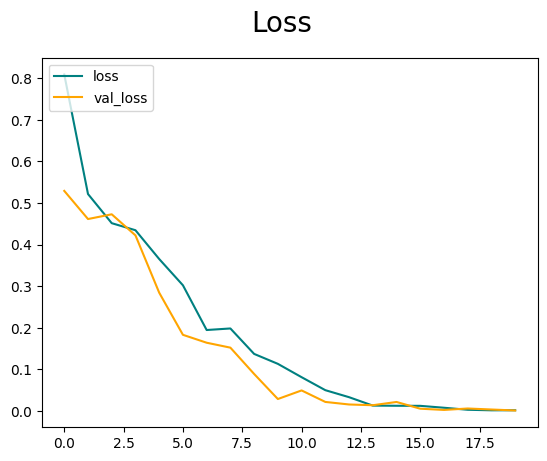

In [62]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

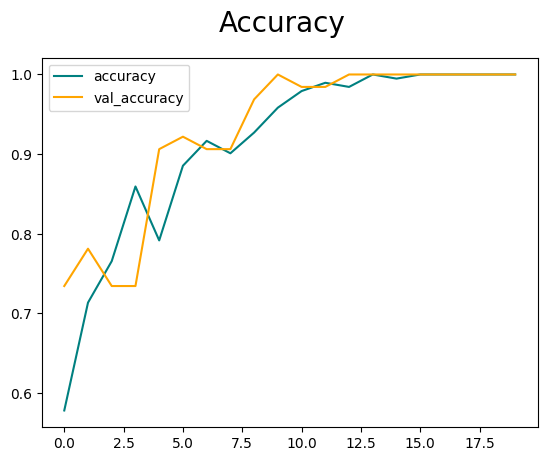

In [63]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [64]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [65]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [66]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


In [70]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 10. Test

In [71]:
import cv2

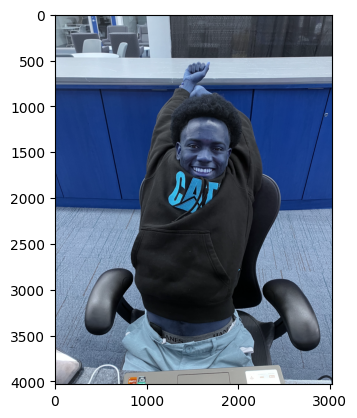

In [94]:
img = cv2.imread('friend.jpg')
plt.imshow(img)
plt.show()

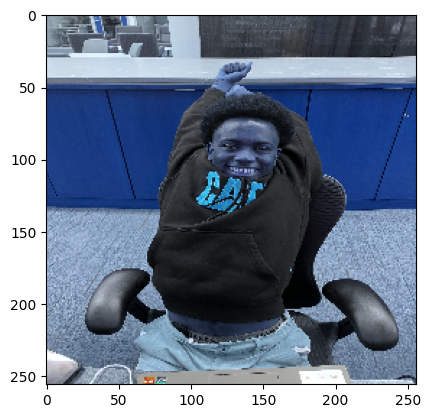

In [95]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [96]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [97]:
yhat

array([[0.37863803]], dtype=float32)

In [98]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [44]:
from tensorflow.keras.models import load_model

In [45]:
model.save(os.path.join('models','imageclassifier.h5'))

In [46]:
new_model = load_model('imageclassifier.h5')

In [47]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[0.01972741]], dtype=float32)